In [1]:
import pandas as pd
import seaborn as sns

In [2]:
"""
Hãy phân tích tác động của điểm toán với điểm DH1, DH2, DH3 dựa trên GT, KV, KT, DT, biết rằng mặc định DT là Kinh
"""

"""
b1: xử lý cơ bản
    1. xác định số lượng biến số tham gia
    2. thu thập dữ liệu
    3. Tổng quan dữ liệu
    4. xứ lý cơ bản
    - loại bỏ dòng trống
    - loại bỏ dòng trùng
    - khảo sát dữ liệu thiếu và điền thiếu
    5. Kiểm tra dữ liệu
"""

'\nb1: xử lý cơ bản\n    1. xác định số lượng biến số tham gia\n    2. thu thập dữ liệu\n    3. Tổng quan dữ liệu\n    4. xứ lý cơ bản\n    - loại bỏ dòng trống\n    - loại bỏ dòng trùng\n    - khảo sát dữ liệu thiếu và điền thiếu\n    5. Kiểm tra dữ liệu\n'

In [3]:
df = pd.read_csv('dulieuxettuyendaihoc.csv', header = 0, delimiter=',', encoding='unicode_escape')

df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)
df['DT'].fillna('Kinh', inplace=True)
df = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6','DH1', 'DH2', 'DH3', 'GT', 'KV', 'KT', 'DT']]
df

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,Kinh
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,Kinh
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,Kinh
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,Kinh
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,Kinh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,5.25,1.50,6.25,F,1,C,Kinh
96,3.7,4.1,3.1,3.4,5.5,5.7,5.25,3.75,4.75,F,1,C,Kinh
97,8.8,9.5,9.5,8.5,9.0,8.5,7.00,8.00,4.00,M,2NT,C,Kinh
98,2.7,2.8,6.2,5.2,4.1,4.3,5.00,3.50,5.50,M,1,C,Kinh


<AxesSubplot:xlabel='DT', ylabel='count'>

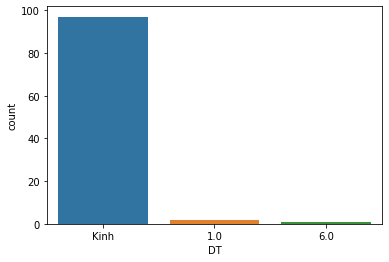

In [4]:
"""Hãy trực quan số lượng sinh viên theo giới tính"""

from numpy import count_nonzero
sns.countplot(x='DT', data=df)

<AxesSubplot:xlabel='GT', ylabel='count'>

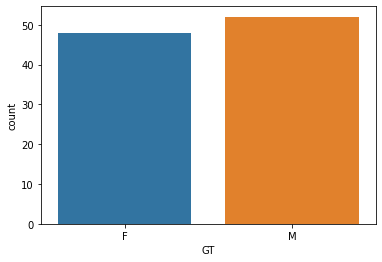

In [5]:

sns.countplot(x='GT', data=df)

<AxesSubplot:xlabel='KV', ylabel='count'>

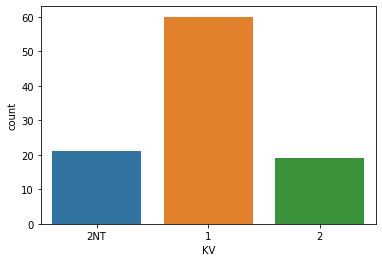

In [6]:

sns.countplot(x='KV', data=df)

In [7]:
"""
Hãy so sánh số lượng học sinh dự thi theo nhóm giới tính
"""

'\nHãy so sánh số lượng học sinh dự thi theo nhóm giới tính\n'

<AxesSubplot:xlabel='KT', ylabel='count'>

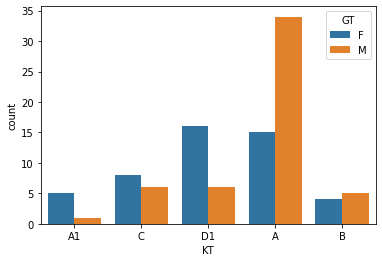

In [8]:
sns.countplot(x='KT', hue='GT', data=df)

<AxesSubplot:xlabel='KT', ylabel='count'>

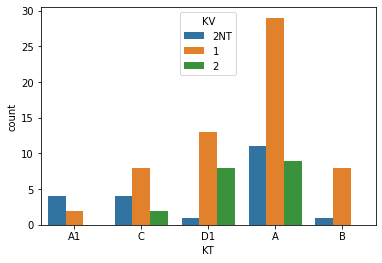

In [9]:
sns.countplot(x='KT', hue='KV', data=df)

<AxesSubplot:xlabel='KV', ylabel='count'>

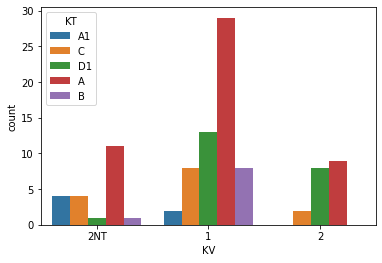

In [10]:
sns.countplot(x='KV', hue='KT', data=df)

<AxesSubplot:xlabel='GT', ylabel='T1'>

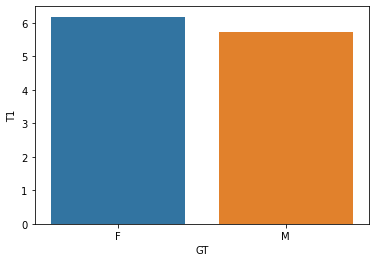

In [11]:
"""
Hãy so sánh điểm toán học kì 1 năm lớp 10 của nhóm giới tính
"""
sns.barplot(x="GT", y='T1', data=df, ci=None)

<AxesSubplot:xlabel='KT', ylabel='DH1'>

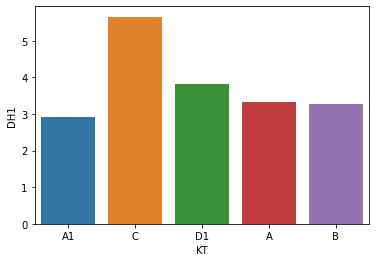

In [12]:
"""
Hãy so sánh điểm trung binfh DH1 trene nnhóm khối thi
"""
sns.barplot(x="KT", y='DH1', data=df, ci=None)

<AxesSubplot:xlabel='GT', ylabel='DH1'>

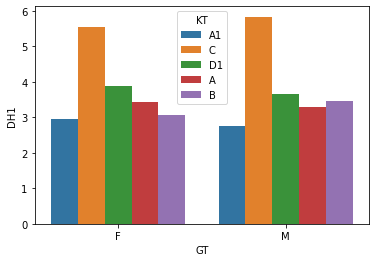

In [13]:
'''So sánh điểm trung bình DH1 theo nhóm giới tính dựa trên khối thi'''
sns.barplot(x='GT', y='DH1', hue='KT', data=df, ci=None)
# plt.show()

In [14]:
# Ngày 04/06/2022
# Kỹ thuật feature engineering
# -> đây là kỹ thuật tạo thêm hoặc biến đổi số liệu sẵn có thành các biến số mới phù hợp nghiệp vụ phân tích

# Ví dụ lệ phí đăng ký thi
# A1: 60000
# C: 40000
# D1: 35000
# A: 55000
# B: 80000
# Hãy tạo ra cột LEPHI thoả mãn yêu cầu trên

dict_map = {
    'A1': 60000, 'C': 40000, 'D1': 35000, 'A': 55000, 'B': 80000
}
df['LEPHI'] = df['KT'].map(dict_map)
df.head()

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT,LEPHI
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,Kinh,60000
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,Kinh,40000
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,Kinh,40000
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,Kinh,35000
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,Kinh,55000


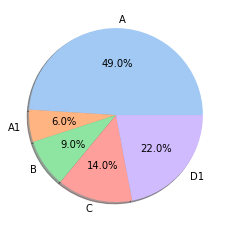

In [15]:
# Biểu đồ Pie
import matplotlib.pyplot as plt
# Mục đích: Trực quan hoá dữ liệu theo nhóm tỉ lệ phần trăm

gb = df.groupby(['KT'])['KT'].agg(['count'])
labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

#Pie theo khu vực


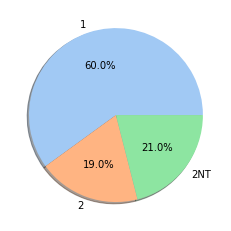

In [16]:
gb = df.groupby(['KV'])['KV'].agg(['count'])
labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

In [17]:
#biến định tính thì chỉ có hàm count để sử dụng tổng hợp
#biến định lượng thì có nhiều hàm để sử dụng như sum, min, max, avg,...

# Trực quan tỉ lệ phần trăm chi phí dự thi trên từng khối thi
gb = df.groupby(['KT'])['LEPHI'].agg(['sum'])
labels = gb.index
# print(labels)
data = list(gb['sum'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


KeyError: '\x08sum'

In [ ]:
# Khi trực quan dữ liệu ta cần lưu ý đến loại biến đang tham gia vào trực quan. Thông thường việc lựa chọn biểu đồ sẽ căn cứ dựa trên ý nghĩa nghiệp vụ và sự phối hợp giữa csac loiaj biến như:
# - ĐỊnh tính kết hợp định đính tính
# - Định tính kết hợp định lượng
# - Định lượng kết hợp định lượng

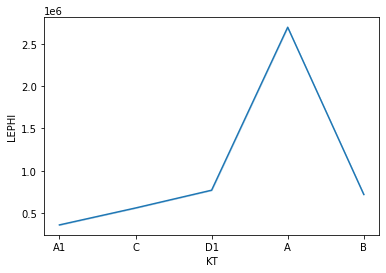

In [62]:
# Biểu đồ line 
# Mục đích: Thường dùng cho trực quan dữ liệu theo thời gian

# Trực quan dữ liệu chi phí dự thi dựa theo khối thi bằng biểu đồ line

sns.lineplot(x='KT', y='LEPHI', data=df, estimator=sum)
plt.show()


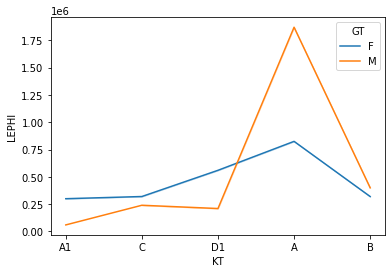

In [28]:
# Trực quan chi phí dự thi theo khối thi theo từng nhóm giới tính bằng biểu đồ line
sns.lineplot(x='KT', y='LEPHI', hue='GT', data=df, estimator=sum)
plt.show()


In [66]:

# Phân tích định lượng
# Phân tích định lượng lấy trọng tâm là các biến định lượng

# bước 1. Mô tả dữ liệu biến định lượng T1

df['T1'].describe()

count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64

In [ ]:
# std càng cao thì dữ liệu biến động càng cao
# std thấp thì mean mới có nghĩa thống kê
# thống kê trên 100 sinh viên
# điểm trung bình là 5.9
# độ biến động dữ liệu là 1.6
# điểm thấp nhất là 2.4
# có 25% sinh viên có điểm nhỏ hơn 5
# 50% sinh viên có điểm nhỏ hơn 5.8
# ...

In [71]:
df[['T1','T2','T3','T4','T5','T6','DH1','DH2','DH3']].describe()

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000
mean,5.946000,6.374000,6.383000,6.291000,6.717000,6.9370,3.740000,4.255000,4.875000
std,1.608338,1.561443,1.574484,1.469563,1.478059,1.3632,1.424408,1.060053,1.041136
min,2.400000,2.800000,2.300000,2.900000,3.000000,3.7000,1.000000,1.500000,2.750000
25%,5.000000,5.300000,5.175000,5.300000,5.800000,6.0000,2.500000,3.500000,4.250000
50%,5.850000,6.250000,6.650000,6.350000,6.800000,7.1000,3.625000,4.125000,4.750000
75%,7.200000,7.525000,7.500000,7.600000,7.800000,8.0000,4.750000,4.750000,5.500000
max,9.300000,9.600000,9.500000,9.400000,9.500000,9.5000,7.000000,8.000000,8.000000


In [72]:
df.groupby('GT')['T1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,6.187500,1.612006,2.4,5.175,6.2,7.300,8.8
M,52.0,5.723077,1.587774,2.5,4.850,5.6,6.525,9.3


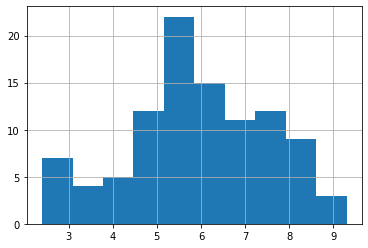

In [73]:
# Histogram cho biết xác xuất xảy ra của biến cố

df['T1'].hist()
plt.show()

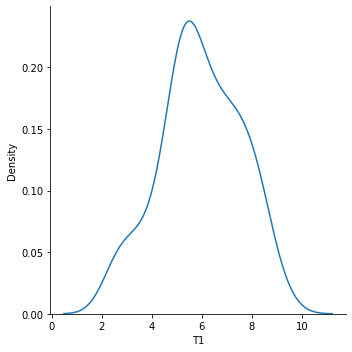

In [18]:
sns.displot(df, x='T1', kind='kde')
plt.show()

In [ ]:
# NGày 07 tháng 6 2022
# Boxplot 
# Đây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng
# Biểu đồ này cung cấp các thông tin quan trọng như 
# 1. Q1:Tứ phân vị 25%
# 2. Q2: Tứ phân vị 50%
# 3. Q3: Tứ phân vị 75%
# 4. Khoảng IQR = Q3 - Q1
# 5. Lower bound = Q1 - 1.5*IQR
# 6. Upper bound = Q3 + 1.5*IQR
# 7. Các ngoại biên(outlier) cần xử lý trong dữ liệu
# Ngoại biên sẽ cần xử lý khi tính giá trị định lượng, tuy nhiên các phương pháp phân tích dữ liệu điều xoay quanh giá trị định lượng, do đó khi dữ liệu có ngoại biên, ta cần tìm phương pháp xử lý ngoại biên. Một số cách
# 1. Có thể loại bỏ nếu giá trị ngoại biên ko tác động mạnh đến vđ phân tích
# 2. Thay thế giá trị ngoại biên bằng 1 giá trị nào đó, bởi vì ngoại biên ko phải là giá trị sai
# 3. Đề ra 1 phương pháp nghiên cứu khác, tách bạch giữa ngoại biên và dữ liệu vốn có
# 4. ...

<AxesSubplot:>

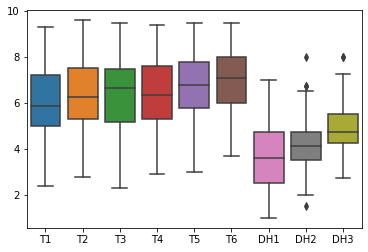

In [21]:
sns.boxplot(data=df[['T1','T2','T3','T4','T5','T6', 'DH1', 'DH2', 'DH3']])

In [ ]:
# DH2 và DH3  xuất hiện ngoại biên

<AxesSubplot:xlabel='GT', ylabel='T1'>

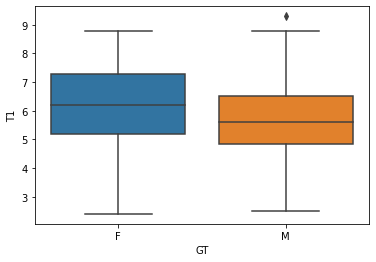

In [30]:
sns.boxplot(x='GT', y='T1' ,data=df)

<AxesSubplot:xlabel='KT', ylabel='DH1'>

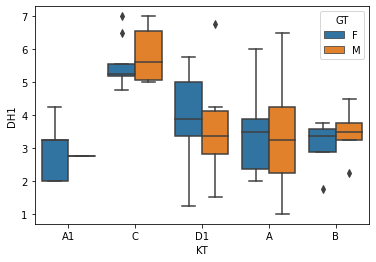

In [37]:
sns.boxplot(x='KT', y='DH1', hue='GT' ,data=df)
# Phân tích dh1 trên từng khôi thi theo giới tính

<AxesSubplot:xlabel='KV', ylabel='DH1'>

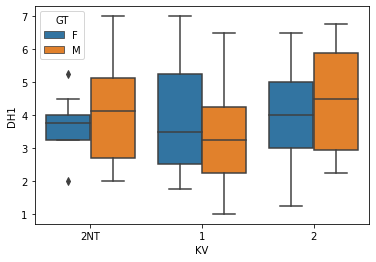

In [39]:
sns.boxplot(x='KV', y='DH1', hue='GT' ,data=df)

In [41]:
# Skewness = độ xiên,độ lớn(trị tuyệt đối) cho biết dữ liệu lệch nhiều hay ít so với đường cong phân phối chuẩn
df['T1'].skew()

-0.17824317486762223

In [44]:
df[['T1', 'T2', 'T3', 'T4', 'DH1', 'DH2', 'DH3']].skew()

T1   -0.178243
T2    0.039634
T3   -0.473535
dtype: float64

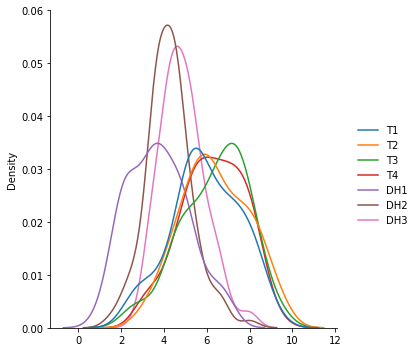

In [51]:
sns.displot(df[['T1', 'T2', 'T3', 'T4', 'DH1', 'DH2', 'DH3']],kind='kde')

In [ ]:
# Note* KHi phân tích dữ liệu với các phương pháp có liên quan đến phân phối chuẩn
# nếu dữ liệu quá lệch so với phân phối chuẩn thì ta cần điều chỉnh bằng các hàm transform cho bớt lệch
# Đặc biệt là phân tích 

In [56]:
# Kurtosis: Độ nhọn, trị tuyệt đối cho biết mức độ nhọn của phân phối

df[['T1', 'T2', 'T3', 'T4', 'T5', 'DH1', 'DH2', 'DH3']].kurtosis()

T1    -0.480104
T2    -0.677771
T3    -0.208899
T4    -0.542134
T5    -0.189668
DH1   -0.517004
DH2    1.372439
DH3    0.442173
dtype: float64

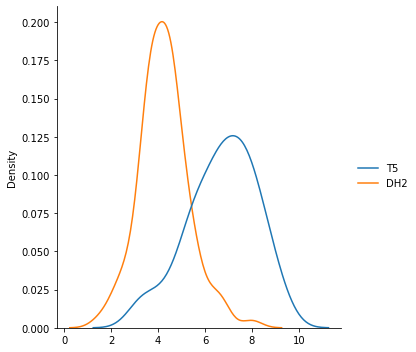

In [55]:
sns.displot(df[[ 'T5', 'DH2']],kind='kde')

In [ ]:
# độ nhọn càng lớn thì giá trị tập trung ở khu vực đó càng lớn
# Phần trung tâm càng cao và nhọn, chỉ số Kurtosis của phân phối đó càng lớn. Hay nói cách khác, kurtosis đo lường độ “béo” phần đuôi của một phân phối xác suất. Cái đuôi càng “béo”, kurtosis càng lớn.z

In [ ]:
# Kiểm định phân phối chuẩn
# có rất nhiều cách để kiểm tra biến định lượng có tuân theo phân phối chuẩn hay ko
# Các phương pháp này thường đc sử dụng trong phân tích hồi quy cho dữ liệu doanh nghiệp

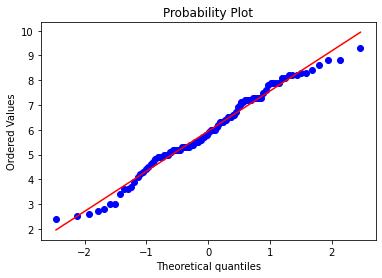

In [62]:
from scipy import stats

stats.probplot(df['T1'], plot=sns.mpl.pyplot)
plt.show()

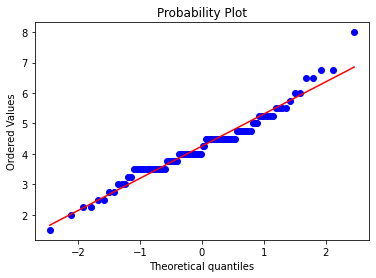

In [68]:
stats.probplot(df['DH2'], plot=sns.mpl.pyplot)
plt.show()

In [70]:
# Pearson Correlation -> Hệ số tương quan đo lường mức độ quan hệ tuyến tính giữa hai biến, không phân biệt biến này phụ thuộc vào biến kia( 2 biến định lượng)

df[['T1', 'T2', 'T4', 'DH1']].corr()

,T1,T2,T4,DH1
T1,1.000000,0.745750,0.520067,0.049254
T2,0.745750,1.000000,0.649281,0.120347
T4,0.520067,0.649281,1.000000,-0.039854
DH1,0.049254,0.120347,-0.039854,1.000000


In [ ]:
# T1 và T2 đồng biến

# T4 và DH1 có giá trị âm -> tương quan nghịch biến

# khi trị tuyệt đối corr >= 0.5 thì khi đó chúng ta mới tính tới chuyện phân tích tương quan hồi quy (còn thấp hơn 0.5 thì ko dùng phương pháp này)

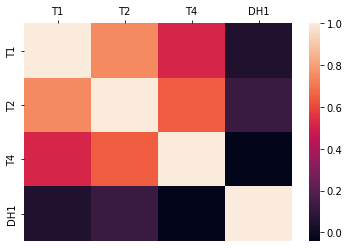

In [73]:
sns.heatmap(df[['T1', 'T2', 'T4', 'DH1']].corr(), vmax=1.0, square=False).xaxis.tick_top()